## Load Data

In [1]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'

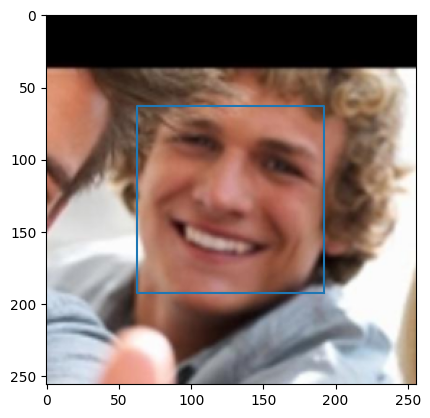

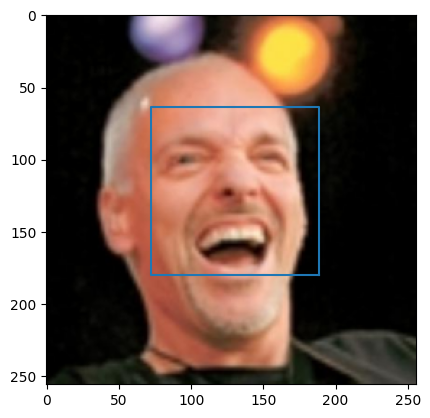

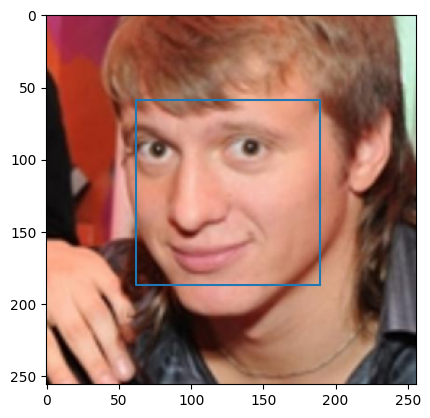

In [2]:
import os
from face_identifier.dataset import FaceDataset


# paths
path = '/home/anthony/Documents/Homework Documents/Inno Lab Group Project/Face Detection'
training_set = FaceDataset(os.path.join(path, 'training.txt'), path)
validation_set = FaceDataset(os.path.join(path, 'validation.txt'), path)
test_set = FaceDataset(os.path.join(path, 'test.txt'), path)

# check image
for i in range(3):
    training_set.draw(i)

## Build Model

In [3]:
import torch
from face_identifier.model import FaceDetector


model = FaceDetector()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = torch.nn.L1Loss()
model

FaceDetector(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
            (activation): ReLU()
            (scale_activation): Hardsigmoid()
          )
          (2): Conv2

## Train Model

In [ ]:
import os
from face_identifier.processes import ModelTrainer, test

save_path = 'face-detector.pt'
if os.path.exists(save_path):
    model.load_state_dict(torch.load(save_path))
trainer = ModelTrainer(model, training_set, validation_set, optimizer, loss_func=loss_func, device=device, batch_size=64,
                       save_path=save_path)
trainer.train(10)

In [ ]:
trainer.train(200)

In [11]:
print(f'Best training loss: {trainer.best_loss:.5f}')

Best training loss: 0.00887


## Test & Visualization

In [5]:
# load the best model
# torch.save(model.state_dict(), 'face-detector-last.pt')
model.load_state_dict(torch.load('face-detector-best.pt'))

<All keys matched successfully>

In [5]:
from torch.utils.data import DataLoader
from face_identifier.processes import test


test_loader = DataLoader(test_set, batch_size=64)
test_loss = test(model, test_loader, loss_func, device=device)
print(f'Test loss: {test_loss:.5f}')

Test loss: 0.00912


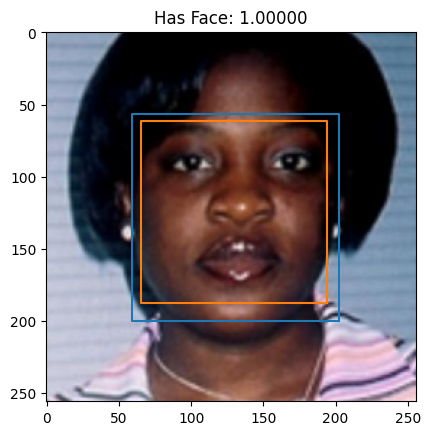

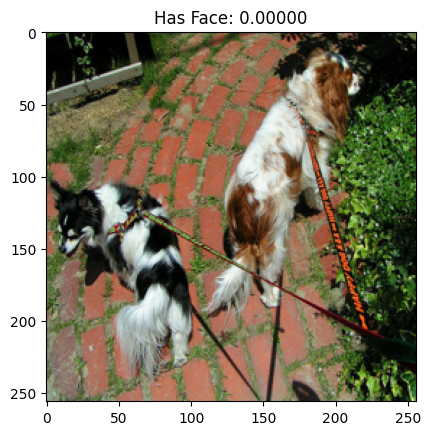

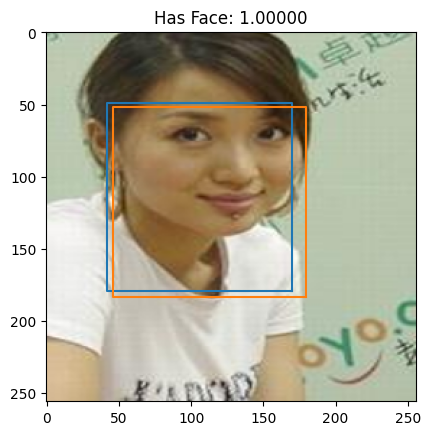

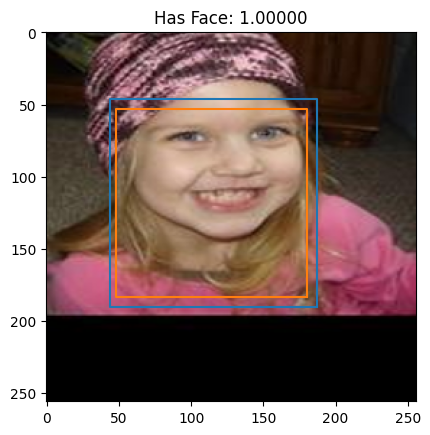

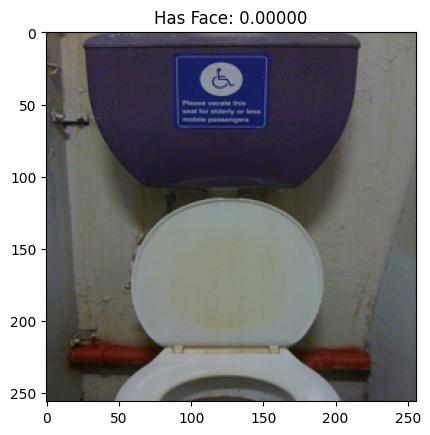

In [6]:
with torch.no_grad():
    model.to("cpu")
    model.eval()
    for i in range(5):
        image, _ = test_set[i]
        image = image.view(1, *image.shape)
        prediction = model(image)[0]
        ax = test_set.draw(i, prediction)
        ax.set_title(f'Has Face: {prediction[0].item():.5f}')